In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [65]:
df = pd.read_csv("C:/Users/user/Downloads/Salary_Data.csv")

In [66]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [131]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [112]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


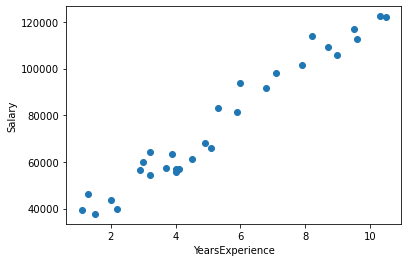

In [158]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
sns.violinplot(y="Age", x="Survived", data=df_data)
plt.title("Survived per Age")
plt.show()

In [132]:
df_1=df.drop("Salary",axis=1)
df_1.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [133]:
df_2=df.drop('YearsExperience',axis=1)
df_2.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [134]:
train_input, test_input, train_target, test_target = train_test_split(
    df_1, df_2, random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

In [136]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [137]:
print(knr.predict([[10]]))


[[114807.66666667]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [138]:
import matplotlib.pyplot as plt


In [139]:
print(np.mean(train_target))

Salary    70416.409091
dtype: float64


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
y_pred = lr.predict(test_input)

In [142]:
print(lr.coef_, lr.intercept_)

[[9371.0160797]] [25478.127436]


In [143]:
from sklearn.metrics import r2_score,mean_squared_error

In [144]:
mse = mean_squared_error(test_target,y_pred)

In [145]:
rsq = r2_score(test_target,y_pred)

In [146]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 38802588.99247065
r square : 0.9347210011126782


In [147]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: [25478.127436]
Coefficient of the line: [[9371.0160797]]


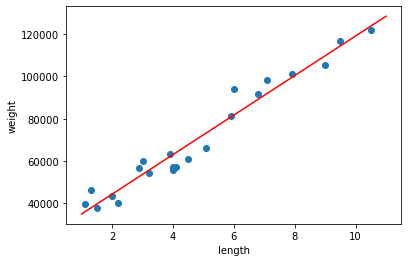

In [149]:
plt.scatter(train_input, train_target)
plt.plot([1, 11], [float(1*lr.coef_+lr.intercept_), float(11*lr.coef_+lr.intercept_)], 'r-')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [88]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9553880313075513
0.9347210011126782


In [150]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [151]:
print(train_poly.shape, test_poly.shape)


(22, 2) (8, 2)


In [152]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[12**2, 12]]))

[[140982.01185672]]


In [153]:
print(lr.coef_, lr.intercept_)

[[  89.21829868 8384.71480107]] [27517.99923445]


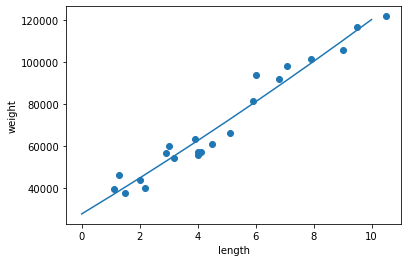

In [163]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(0, 11)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(89.21*point**2 + 8384.71*point + 27517.999)
# 50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [155]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9560103268660353
0.9316243309827185
